In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/topic_dump_1-1.csv")

In [3]:
data[data['topic'].str.contains("sinyal")]

,Unnamed: 0,rank,topic,totalCount,Cluster
2,2,3,kekuatan sinyal,15,Internet.Network.Speed
12,12,13,stabilitas sinyal,5,Internet.Network.Staility
13,13,14,kecepatan sinyal,7,Internet.Network.Staility
23,23,24,jaringan sinyal,4,NaN
33,33,34,sinyal nya,5,NaN
36,36,37,sinyal harus,3,NaN
37,37,38,kualitas sinyal,4,NaN
39,39,40,sinyal lemah,4,NaN
43,43,44,sinyal 4g,3,NaN
44,44,45,sinyal jaringan,3,NaN


In [0]:
data = data[data['totalCount']>1]

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
data['topic'] = data.topic.str.lower()
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
tfidf.fit(data.topic)
text = tfidf.transform(data.topic)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


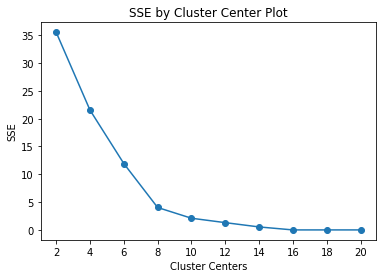

In [0]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [0]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [0]:
data['Cluster'] = clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 2)


Cluster 0
jaringan,lambat

Cluster 1
tolong,jaringan

Cluster 2
sinyal,tolong

Cluster 3
tolong,sinyal

Cluster 4
sinyal,tolong

Cluster 5
jaringan,internet

Cluster 6
jaringan,4g

Cluster 7
internet,kecepatan

Cluster 8
jaringan,sinyal

Cluster 9
sinyal,4g


In [0]:
grouped = data.groupby("Cluster")
for name,group in grouped:
   print (name)
  #  print (group)
  #  print (group['totalCount'].max())
   print (group[group['totalCount']== group['totalCount'].max()]['topic'].tolist()[0])

0
sinyal 4g
1
smartfren application
2
kualitas jaringan
3
jaringan sinyal
4
kecepatan jaringan
5
agak lambat
6
tolong tambah
7
kekuatan sinyal
8
kecepatan internet
9
signal 4g
10
jaringan 4g
11
jaringan internet


In [0]:
grouped = data.groupby("Cluster")
for name,group in grouped:
   print (name)
   print (group)
  #  print (group['totalCount'].max())

0
    Unnamed: 0  rank      topic  totalCount  Cluster
24          24    25  sinyal 4g           6        0
43          43    44  sinyal 4g           3        0
1
     Unnamed: 0  rank                          topic  totalCount  Cluster
15           15    16                   sering salah           5        1
16           16    17                  kurang stabil           7        1
22           22    23          smartfren application           9        1
25           25    26                  periksa kuota           4        1
26           26    27             bagian pendaftaran           3        1
29           29    30                 kartu keluarga           3        1
30           30    31                 periksa kredit           6        1
35           35    36                     notif test           4        1
41           41    42            seberapa kecil baik           3        1
42           42    43                     paket awal           2        1
46           46    47  

In [0]:
tfidf = TfidfVectorizer(
    min_df = 1,
    max_df = 0.95,
    max_features = 8000
)
tfidf.fit(data[data['Cluster']==0].topic)
text = tfidf.transform(data[data['Cluster']==0].topic)
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
df = data[data['Cluster']==0]
df['DeepCluster'] = clusters
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,rank,topic,totalCount,Cluster,DeepCluster
15,15,16,sering salah,5,0,9
16,16,17,kurang stabil,7,0,1
22,22,23,smartfren application,9,0,1
29,29,30,kartu Keluarga,3,0,1
30,30,31,periksa kredit,6,0,1
35,35,36,notif test,4,0,1
41,41,42,seberapa kecil baik,3,0,0
42,42,43,Paket awal,2,0,0
46,46,47,masih sulit,2,0,0
48,48,49,wilayah suci,2,0,1


In [0]:
data.groupby(['Cluster']).agg({'totalCount':sum}).sort_values("totalCount")

,totalCount
Cluster,
9,9
8,15
4,23
0,27
6,29
3,44
5,47
1,83
7,85


In [0]:
grouped = df.groupby("DeepCluster")
for name,group in grouped:
   print (name)
   print (group)

0
     Unnamed: 0  rank  ... Cluster  DeepCluster
41           41    42  ...       0            0
42           42    43  ...       0            0
46           46    47  ...       0            0
55           55    56  ...       0            0
62           62    63  ...       0            0
66           66    67  ...       0            0
76           76    77  ...       0            0
108         108   109  ...       0            0
112         112   113  ...       0            0
114         114   115  ...       0            0
115         115   116  ...       0            0
116         116   117  ...       0            0
119         119   120  ...       0            0
144         144   145  ...       0            0
145         145   146  ...       0            0
147         147   148  ...       0            0
148         148   149  ...       0            0
170         170   171  ...       0            0
176         176   177  ...       0            0
179         179   180  ...       0    

In [0]:
data

,Unnamed: 0,rank,topic,totalCount,Cluster
0,0,1,kecepatan internet,35,7
1,1,2,kecepatan jaringan,27,7
2,2,3,kekuatan sinyal,15,3
3,3,4,jaringan 4g,14,6
4,4,5,tolong tambah,10,4
5,5,6,koneksi internet,16,5
6,6,7,kualitas jaringan,13,1
7,7,8,jaringan nya,8,1
8,8,9,jaringan internet,10,5
9,9,10,jaringan internet,16,5


In [0]:
data['topic'] = data['topic'].astype('str') 
data['topic_copy'] = data['topic']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data['topic'][15]

'sering salah'

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 198
Data columns (total 6 columns):
Unnamed: 0    91 non-null int64
rank          91 non-null int64
topic         91 non-null object
totalCount    91 non-null int64
Cluster       91 non-null int32
topic_copy    91 non-null object
dtypes: int32(1), int64(3), object(2)
memory usage: 7.1+ KB


In [0]:
results = data.loc[:, ["topic", "topic_copy"]].apply(lambda x: edit_distance(*x), axis=1)

In [0]:
from nltk.metrics import edit_distance
data["distance"] = data.loc[:, ["topic","topic_copy"]].apply(lambda x: edit_distance(*x), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
import editdistance

In [0]:
data[data.topic.apply(lambda x: int(editdistance.eval("sinyal 4g", x)) <= 3)]

,Unnamed: 0,rank,topic,totalCount,Cluster,topic_copy,distance
24,24,25,sinyal 4g,6,0,sinyal 4g,0
33,33,34,sinyal nya,5,7,sinyal nya,0
43,43,44,sinyal 4g,3,0,sinyal 4g,0
91,91,92,signal 4g,2,9,signal 4g,0


In [0]:
cust_data = pd.read_csv("/content/smartfrentopicpredict-2.csv")

In [16]:
cust_data

,Unnamed: 0,comment,project,respondentId,Topic
0,0,Signal kamu ialah terendah di Godean. Jogja. P...,Activation,ff8ba36e-0e82-40e3-85f3-ae8472033b7c,['INTERNET NETWORK']
1,1,Tolong tingkatkan kecepatan internet pada saat...,Activation,0827f0ca-f0e2-4797-b965-8710cf9ab072,"['INTERNET NETWORK', 'INTERNET NETWORK: speed'..."
2,2,Kualitas jaringan nya kenapa semakin hari sema...,Activation,a2b78799-0a6a-481a-806b-2f885dc67beb,"['INTERNET NETWORK', 'INTERNET NETWORK: streng..."
3,3,Signal atau jaringan internet sangat lamban.. ...,Activation,ec9bb117-50c1-4ec0-83f3-623da89708af,"['INTERNET NETWORK', 'INTERNET NETWORK: speed'..."
4,4,Semua nya harus ditingkatkan sebel pake smartf...,Activation,fba5c16f-f2a7-4c29-b36d-aa8e9130d6ff,"['INTERNET NETWORK', 'INTERNET NETWORK: improv..."
5,5,"JARINGAN NYA TOLONG DI PERBAIKI., KATA NYA 4G+...",Activation,f32cf0e9-2575-43ad-9d24-055f0a27bc48,"['INTERNET NETWORK', 'INTERNET NETWORK: improv..."
6,6,Jaringan nya jangan lelet banget buka apa apa ...,Activation,588ba211-f474-4b1a-84a9-3d4aed072785,"['INTERNET NETWORK', 'INTERNET NETWORK: speed'..."
7,7,Katanya alimitid sebulan kok baru makek cm 4 h...,Activation,734dbe6a-a05c-4f0a-8d66-187e1453c2a3,['DAILY FUP']
8,8,Untuk di bagian sinyal di daerah priok tepatny...,Activation,e3f139b2-8680-4ead-9dd4-0167341f28a4,"['INTERNET NETWORK', 'INTERNET NETWORK: covera..."
9,9,"Jaringan di perkuat, sejak tambah pengguna sek...",Activation,0a687933-64a7-4202-90e1-a933003b9f3e,"['INTERNET NETWORK', 'INTERNET NETWORK: speed'..."


In [0]:
from gensim.parsing.preprocessing import remove_stopwords

In [0]:
doc_final = remove_stopwords("-".join(cust_data['comment'].tolist()))

In [18]:
cust_data['comment'].tolist()

['Signal kamu ialah terendah di Godean. Jogja. Pekan pun tak ada signal. Boleh buang laut. Bulan ke 2 ni saya tak akan guna lagi. WA pun tak boleh chat. Apa lagi dengan video. ? Tutup je perusahaan kamu. Rugi 64 ribu wang aku',
 'Tolong tingkatkan kecepatan internet pada saat mencapai FUP seperti dulu menjadi 65kbps-128kbps. Sekarang saat sudah mencapai FUP susah untuk mengakses apapun. Saya berharap pihak smartfren bisa menanggapi ini.',
 'Kualitas jaringan nya kenapa semakin hari semakin hancur alias jelek sekali beda sekali dengan promo dan iklan nya katanya super 4G+ tapi kenyataan nya jelek banget (jaringan)',
 'Signal atau jaringan internet sangat lamban.. buka youtube hanya muter muter.. khusus didaerah rumah saya.. padahal dekat dengan perkotaan dn saya sudah pakai hp 4G ',
 'Semua nya harus ditingkatkan sebel pake smartfren kirain jaringannya lebih bagus dari pada yang lain eh rupanya lebih buruk ',
 'JARINGAN NYA TOLONG DI PERBAIKI., KATA NYA 4G+ HD TAPI KENYATAAN NYA KENAPA 

In [11]:
import nltk
# nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
bigram = gensim.models.Phrases(data_token, min_count=1, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_token], threshold=100) 

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [47]:
corpus = gensim.models.PhraseItertor(bigram, data_token)


AttributeError: ignored

In [45]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(doc_final) 
  
filtered_sentence = [w for w in word_tokens if w not in stop_words] 
import gensim
%time documents = gensim.utils.simple_preprocess(" ".join(filtered_sentence))
# model = gensim.models.Word2Vec(
#         doc_final,
#         size=300,
#         window=20,
#         min_count=2,
#         workers=20,
#         iter=10)

data_token = [eachReview.split() for eachReview in cust_data['comment'].tolist() ]
model = gensim.models.Word2Vec(bigram,min_count=1,size= 32)

CPU times: user 29.3 ms, sys: 79 µs, total: 29.4 ms
Wall time: 29.4 ms


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


TypeError: ignored

In [29]:
print(model['Jaringannya'])

[-0.06272586 -0.02061635 -0.09723278  0.06416299 -0.01950876  0.05642864
  0.05831929 -0.00870181  0.02977967  0.01574756 -0.10203534  0.13381322
 -0.02637571  0.03776354  0.02829318  0.03466573 -0.24850254 -0.09839185
 -0.02153867 -0.0187655  -0.08900505 -0.07855386 -0.10237466 -0.05343626
 -0.04497042  0.03647418 -0.02951926 -0.02332512  0.06464291 -0.106801
 -0.06820542 -0.02404513]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
model.most_similar('youtube')
# model.similarity('4g', 'kurang')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('perbaiki', 0.977558434009552),
 ('buruk', 0.9760163426399231),
 ('kita', 0.9743897914886475),
 ('topup', 0.9736999273300171),
 ('bagus', 0.9736836552619934),
 ('kali', 0.973629891872406),
 ('dengan', 0.9736153483390808),
 ('buat', 0.9735907912254333),
 ('mengisi', 0.9735897183418274),
 ('Jaringan', 0.9734835624694824)]